In [2]:
from tensorflow.keras.datasets import cifar10

(features_train, label_train), (features_test, label_test) = cifar10.load_data()

In [3]:
features_train.shape
len(features_train)

50000

In [4]:
batch_size = 16
img_height = 32
img_width = 32

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_img_gen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
val_img_gen = ImageDataGenerator(rescale=1./255)

train_data_gen = train_img_gen.flow(features_train, label_train, batch_size=batch_size)
val_data_gen = train_img_gen.flow(features_test, label_test, batch_size=batch_size)

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

np.random.seed(8)
tf.random.set_seed(8)

In [6]:
model = tf.keras.Sequential([
    layers.Conv2D(64, 3, activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(0.001)


In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'] )

In [8]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

model.fit_generator(train_data_gen, steps_per_epoch=len(features_train)//batch_size, epochs=5, validation_data=val_data_gen, \
                    validation_steps= len(features_test)//batch_size)

Epoch 1/5
3125/3125 [==============================] - 388s 124ms/step - loss: 1.4998 - accuracy: 0.4564 - val_loss: 1.2111 - val_accuracy: 0.5720
Epoch 2/5
3125/3125 [==============================] - 374s 120ms/step - loss: 1.1780 - accuracy: 0.5829 - val_loss: 1.0775 - val_accuracy: 0.6221
Epoch 3/5
3125/3125 [==============================] - 379s 121ms/step - loss: 1.0663 - accuracy: 0.6247 - val_loss: 1.0438 - val_accuracy: 0.6384
Epoch 4/5
3125/3125 [==============================] - 378s 121ms/step - loss: 1.0153 - accuracy: 0.6421 - val_loss: 0.9796 - val_accuracy: 0.6541
Epoch 5/5
3125/3125 [==============================] - 384s 123ms/step - loss: 0.9671 - accuracy: 0.6607 - val_loss: 0.9690 - val_accuracy: 0.6666


In [37]:
image_string = tf.io.read_file('/Users/tengyaolong/Desktop/download-1.jpg')
image_decoded = tf.io.decode_jpeg(image_string, channels=3)
image = tf.cast(image_decoded, tf.float32)
image_input = image/255.0
np.expand_dims(image_input, axis=0)
image_input = tf.reshape(image_input, [1,32,32,3])
print(image_input.shape)

(1, 32, 32, 3)


In [38]:
x = model.predict(image_input)

In [39]:
x.argmax()

3

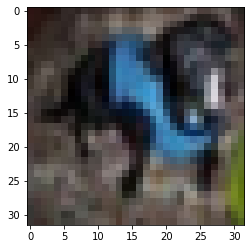

In [40]:
import matplotlib.pyplot as plt

plt.imshow(features_train[27])


In [30]:
# airplane : 0
# automobile : 1
# bird : 2
# cat : 3
# deer : 4
# dog : 5
# frog : 6
# horse : 7
# ship : 8
# truck : 9